#### Exercicis d'anàlisi de sentiment i textos.

### - Exercici 1
#### Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('treebank')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

[nltk_data] Error loading punkt: <urlopen error EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1129)>
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/esthersanroma/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/esthersanroma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/esthersanroma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/esthersanroma/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


El text escollit és un text de twiter: Wisconsin welcomed us home with a winter snowstorm, but celebrating Mardi Gras these past few days has been incredible. Have you ever been? What an experience! New Orleans folks know how to have fun. I loved it. 🍹🎉✨
Traduït del: anglès per
Wisconsin ens va rebre a casa amb una tempesta de neu hivernal, però celebrar el Mardi Gras aquests darrers dies ha estat increïble. Has estat mai? Quina experiència! La gent de Nova Orleans sap com divertir-se. Em va encantar. 🍹🎉✨
4.777 Visualitzacions, 2 Retuits, 58 Agradaments.

In [104]:
text_twiter="wisconsin welcomed us home with a winter snowstorm, but celebrating mardi gras these past few days has been incredible. have you ever been? what an experience! new orleans folks know how to have fun. i loved it. "

La tokenització és el primer pas en l'anàlisi de textos. El procés de descomposició d'un paràgraf de text en fragments més petits, com ara paraules o frases, s'anomena Tokenization. El testimoni és una entitat única que constitueix els blocs de construcció d'una frase o d'un paràgraf.

In [105]:
tokenized_text=sent_tokenize(text_twiter)
print(tokenized_text)

['wisconsin welcomed us home with a winter snowstorm, but celebrating mardi gras these past few days has been incredible.', 'have you ever been?', 'what an experience!', 'new orleans folks know how to have fun.', 'i loved it.']


In [106]:
tokenized_word= word_tokenize(text_twiter)
print(tokenized_word)

['wisconsin', 'welcomed', 'us', 'home', 'with', 'a', 'winter', 'snowstorm', ',', 'but', 'celebrating', 'mardi', 'gras', 'these', 'past', 'few', 'days', 'has', 'been', 'incredible', '.', 'have', 'you', 'ever', 'been', '?', 'what', 'an', 'experience', '!', 'new', 'orleans', 'folks', 'know', 'how', 'to', 'have', 'fun', '.', 'i', 'loved', 'it', '.']


In [107]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 39 samples and 43 outcomes>


[('.', 3), ('been', 2), ('have', 2), ('wisconsin', 1), ('welcomed', 1)]


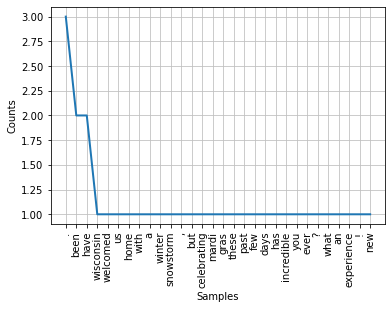

In [108]:
print(fdist.most_common(5))
fdist.plot(30,cumulative=False)
plt.show()

### - Exercici 2
#### Treu les stopwords i realitza stemming al teu conjunt de dades.

Stopwords considerades com a soroll en el text. El text pot contenir paraules d'aturada com ara is, am, are, this, a, an, the, etc.
A NLTK per eliminar les paraules clau, heu de crear una llista de paraules clau i filtrar la vostra llista de fitxes a partir d'aquestes paraules.

In [109]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'won', 're', 'ourselves', 'hers', 'couldn', 'didn', 'doesn', 'off', 'over', "don't", 'and', 'm', 'mustn', 've', 'for', "shouldn't", 'who', 'theirs', 'while', 'weren', 'here', 'he', 'which', 'shan', 'that', 's', 'both', 'to', 'me', 'then', 'only', "didn't", 'has', 'his', 'were', 'had', 'needn', 'the', 'was', 'hasn', 'are', 'my', "you've", 'should', 'against', 'their', 'll', 'is', 'an', 'not', 'its', 'nor', 'so', 'whom', 'do', 'at', 'just', 'yourselves', 'as', 'him', 'each', 'where', 'with', "it's", 'd', 'between', 'before', "shan't", 'more', 'but', 'other', "aren't", 'they', 'have', 'or', 'be', 'own', 'ma', 't', 'from', "that'll", "weren't", "isn't", "doesn't", "needn't", 'mightn', 'them', 'under', 'don', 'what', 'through', 'after', 'no', 'can', 'if', 'isn', "hadn't", 'of', 'how', 'during', 'a', "mustn't", 'there', 'why', 'down', 'than', 'about', 'itself', 'it', 'these', 'this', 'such', 'too', 'yours', 'by', 'ours', "you'd", 'himself', 'until', 'further', 'she', "haven't", "mightn't", 

In [110]:
filtered_sent = [w for w in tokenized_word if not w in stop_words]
print("Tokenized Sentence twiter:", tokenized_word)
print("Filtered Sentence twiter:", filtered_sent)

Tokenized Sentence twiter: ['wisconsin', 'welcomed', 'us', 'home', 'with', 'a', 'winter', 'snowstorm', ',', 'but', 'celebrating', 'mardi', 'gras', 'these', 'past', 'few', 'days', 'has', 'been', 'incredible', '.', 'have', 'you', 'ever', 'been', '?', 'what', 'an', 'experience', '!', 'new', 'orleans', 'folks', 'know', 'how', 'to', 'have', 'fun', '.', 'i', 'loved', 'it', '.']
Filtered Sentence twiter: ['wisconsin', 'welcomed', 'us', 'home', 'winter', 'snowstorm', ',', 'celebrating', 'mardi', 'gras', 'past', 'days', 'incredible', '.', 'ever', '?', 'experience', '!', 'new', 'orleans', 'folks', 'know', 'fun', '.', 'loved', '.']


Stemming és un procés de normalització lingüística, que redueix les paraules a la seva paraula arrel o talla els afixos de derivació. Per exemple, connection, connected, connecting  es redueix a una paraula comuna "connect".

In [111]:
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['wisconsin', 'welcomed', 'us', 'home', 'winter', 'snowstorm', ',', 'celebrating', 'mardi', 'gras', 'past', 'days', 'incredible', '.', 'ever', '?', 'experience', '!', 'new', 'orleans', 'folks', 'know', 'fun', '.', 'loved', '.']
Stemmed Sentence: ['wisconsin', 'welcom', 'us', 'home', 'winter', 'snowstorm', ',', 'celebr', 'mardi', 'gra', 'past', 'day', 'incred', '.', 'ever', '?', 'experi', '!', 'new', 'orlean', 'folk', 'know', 'fun', '.', 'love', '.']


In [112]:
tokens=nltk.word_tokenize(text_twiter)
print(tokens)

['wisconsin', 'welcomed', 'us', 'home', 'with', 'a', 'winter', 'snowstorm', ',', 'but', 'celebrating', 'mardi', 'gras', 'these', 'past', 'few', 'days', 'has', 'been', 'incredible', '.', 'have', 'you', 'ever', 'been', '?', 'what', 'an', 'experience', '!', 'new', 'orleans', 'folks', 'know', 'how', 'to', 'have', 'fun', '.', 'i', 'loved', 'it', '.']


L'objectiu principal de l'etiquetatge Part-of-Speech (POS) és identificar el grup gramatical d'una paraula determinada. Tant si es tracta d'un SUBSTANTIU, PRONOM, ADJECTIU, VERB, ADVERBIS, etc. en funció del context. L'etiquetatge POS busca relacions dins de la frase i assigna una etiqueta corresponent a la paraula.

In [113]:
nltk.pos_tag(tokens)

[('wisconsin', 'NN'),
 ('welcomed', 'VBD'),
 ('us', 'PRP'),
 ('home', 'NN'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('winter', 'NN'),
 ('snowstorm', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('celebrating', 'VBG'),
 ('mardi', 'JJ'),
 ('gras', 'NNS'),
 ('these', 'DT'),
 ('past', 'IN'),
 ('few', 'JJ'),
 ('days', 'NNS'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('incredible', 'JJ'),
 ('.', '.'),
 ('have', 'VBP'),
 ('you', 'PRP'),
 ('ever', 'RB'),
 ('been', 'VBN'),
 ('?', '.'),
 ('what', 'WP'),
 ('an', 'DT'),
 ('experience', 'NN'),
 ('!', '.'),
 ('new', 'JJ'),
 ('orleans', 'NNS'),
 ('folks', 'NNS'),
 ('know', 'VBP'),
 ('how', 'WRB'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('fun', 'NN'),
 ('.', '.'),
 ('i', 'NN'),
 ('loved', 'VBD'),
 ('it', 'PRP'),
 ('.', '.')]

### - Exercici 3
#### Realitza sentiment analysis al teu conjunt de dades.

In [114]:
from textblob import TextBlob
blob = TextBlob(text_twiter)
sentiment = blob.sentiment.polarity
print("text twiter",sentiment)

text twiter 0.28106060606060607


El sentiment general del text, sent negatiu quan està per sota de zero, neutre quan és zero i positiu quan està per sobre de zero. En aquest cas, la puntuació està per sobre de zero, el que indica que el sentiment del text és lleugerament positiu.

In [115]:
sentences = nltk.sent_tokenize(text_twiter)
sentences = text_twiter.split('.')
print(sentences)

['wisconsin welcomed us home with a winter snowstorm, but celebrating mardi gras these past few days has been incredible', ' have you ever been? what an experience! new orleans folks know how to have fun', ' i loved it', ' ']


In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Defineix el conjunt de dades preetiquetat
labeled_data = [
    {'text_twiter': 'Wisconsin welcomed us home with a winter snowstorm, but celebrating Mardi Gras these past few days has been incredible. Have you ever been? What an experience! New Orleans folks know how to have fun. I loved it.', 'emotion': 'pos'},
    {'text_twiter': 'Another boring day at home. Nothing to do.', 'emotion': 'neg'},
    {'text_twiter': 'I just got a promotion at work! Feeling so happy and excited!', 'emotion': 'pos'},
    {'text_twiter': 'I hate being stuck in traffic every day. It makes me so frustrated!', 'emotion': 'neg'}
    # ...
]

text_twiter = [data['text_twiter'] for data in labeled_data]
emotions = [data['emotion'] for data in labeled_data]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_twiter)
y = emotions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy twiter:', accuracy)



blob = TextBlob("wisconsin welcomed us home with a winter snowstorm, but celebrating mardi gras these past few days has been incredible. have you ever been? what an experience! new orleans folks know how to have fun. i love wisconsin.")
text_twiter_vector = vectorizer.transform([str(blob)])
sentiment = clf.predict(text_twiter_vector)[0]

print("La polaritat de sentiments del text_twiter és:", sentiment)


Accuracy twiter: 1.0
La polaritat de sentiments del text_twiter és: pos


El model de machine learning basat en Naive Bayes utilitza el conteig de paraules per a classificar el text, mentre que TextBlob utilitza un enfocament basat en regles lingüístiques per a inferir el sentiment.

MultinomialNB() és una implementació de l'algoritme de Naive Bayes per a classificació de textos. Concretament, MultinomialNB() s'utilitza quan es vol fer una classificació de textos amb freqüències de paraules, com en aquest cas on s'utilitza CountVectorizer() per a transformar les paraules dels textos en vectors de freqüència. Així doncs, s'està fent servir Naive Bayes amb el mètode multinomial per a classificar les emocions dels textos.
En aquest cas, s'han proporcionat diversos tuits amb el seu corresponent sentiment (pos o neg) com a etiqueta. Això permet entrenar un model per predir el sentiment de nous tuits.